In [1]:
#Used libraries
import numpy as np # for linear algebra (multidimensional arrays)
import pandas as pd # data processing, CSV, Json, etc. file I/O 
from matplotlib import pyplot as plt #for plotting 
import seaborn as sns #also for plotting
from collections import Counter 
from sklearn.preprocessing import MultiLabelBinarizer #to trabsform ingredients into multilabel table format
import re
import base64
import pdb


# Exploratory Analysis

In [2]:
traindf = pd.read_json('train.json', orient='columns')
testdf = pd.read_json('test.json', orient='columns')

Exploring Training-set

In [3]:
#Displaying 20 first rows to discover the general data structure with some values
traindf.head(20)

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli..."
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo..."
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-..."


In [4]:
#Information about the training-set (each attribute, its type and the number of its elements)
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


we have 39774 elements in total without null ones, ides are of int64 type, cuisine and ingredients are of object type

In [5]:
print("the number of total recipes in the training set is : ", len(traindf))
print("the shape of the taining set is : ", traindf.shape, " :\n ",traindf.shape[0], "objects with ", traindf.shape[1]," attributes each")

the number of total recipes in the training set is :  39774
the shape of the taining set is :  (39774, 3)  :
  39774 objects with  3  attributes each


Test-set exploration and quick overview

In [6]:
testdf.head(20)

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."
5,38527,"[baking powder, all-purpose flour, peach slice..."
6,19666,"[grape juice, orange, white zinfandel]"
7,41217,"[ground ginger, white pepper, green onions, or..."
8,28753,"[diced onions, taco seasoning mix, all-purpose..."
9,22659,"[eggs, cherries, dates, dark muscovado sugar, ..."


The target variable is cuisine which is not present in the test-set

In [7]:
#Information about the test-set (each attribute, its type and the number of its elements)
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 2 columns):
id             9944 non-null int64
ingredients    9944 non-null object
dtypes: int64(1), object(1)
memory usage: 155.5+ KB


We have 9944 elements in total without null ones, ides are of int64 type, ingredients are of object type

In [8]:
print("the number of total recipes in the test-set is : ", len(testdf))
print("the shape of the test set is : ", testdf.shape, " :\n ",testdf.shape[0], "objects with ", testdf.shape[1]," attributes each")
print("the proportion of the test-set is : ", 100*len(testdf)/(len(traindf) + len(testdf)), "% of total data")

the number of total recipes in the test-set is :  9944
the shape of the test set is :  (9944, 2)  :
  9944 objects with  2  attributes each
the proportion of the test-set is :  20.000804537592018 % of total data


# In depth Data and target variable analysis

### 1- Our training Set

In [9]:
print("The number of distinct countries (same class recipes) is : ", len(traindf.cuisine.unique()))
print("These countries are : ", pd.DataFrame(traindf.cuisine.unique()))

The number of distinct countries (same class recipes) is :  20
These countries are :                 0
0          greek
1    southern_us
2       filipino
3         indian
4       jamaican
5        spanish
6        italian
7        mexican
8        chinese
9        british
10          thai
11    vietnamese
12  cajun_creole
13     brazilian
14        french
15      japanese
16         irish
17        korean
18      moroccan
19       russian


We have more than 2 classes (countries) to predict, so we're dealing with a multi-class classification problem

In [10]:
print("The number of recipes per country is : " )

n_recipes_per_country = traindf.groupby("cuisine")['id'].count().sort_values(ascending =False).reset_index().rename(columns={'cuisine':"cuisine (country)", 'id':"Number of recipes"})
n_recipes_per_country

The number of recipes per country is : 


,cuisine (country),Number of recipes
0,italian,7838
1,mexican,6438
2,southern_us,4320
3,indian,3003
4,chinese,2673
5,french,2646
6,cajun_creole,1546
7,thai,1539
8,japanese,1423
9,greek,1175


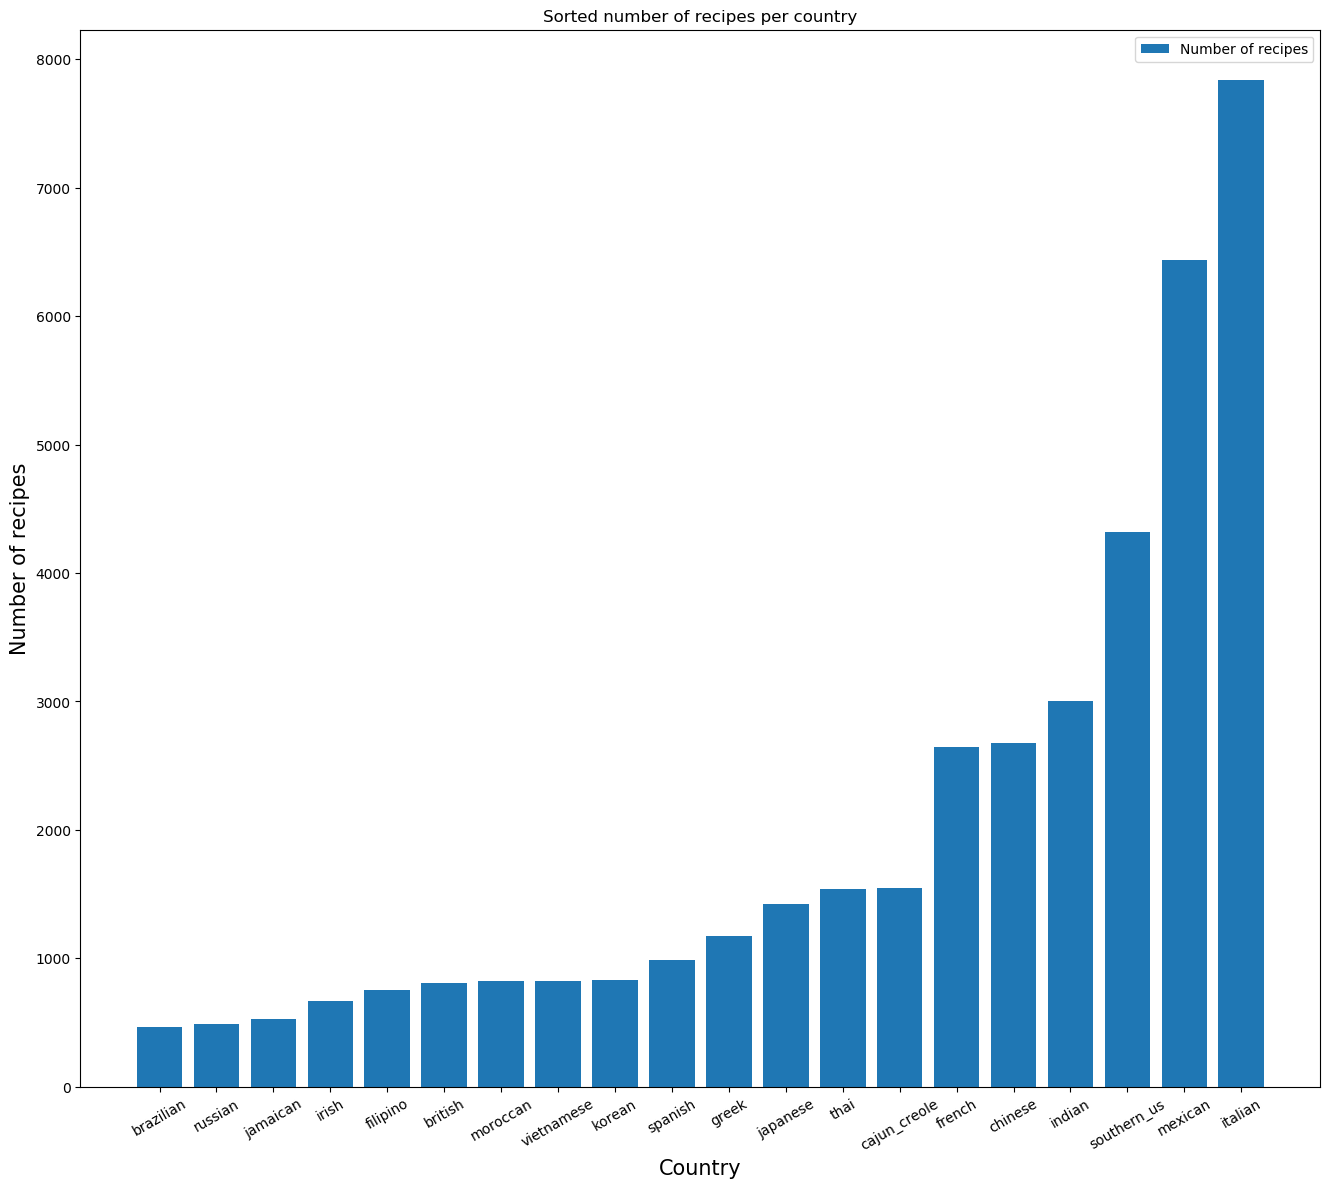

In [11]:
# plotting those recipes for more visibity
#label = "number of recipes per country"

x_axis = n_recipes_per_country["cuisine (country)"].tolist()[::-1]
y_axis = n_recipes_per_country["Number of recipes"].tolist()[::-1]
index = np.arange(len(x_axis))
plt.figure(figsize=(16, 14), dpi= 100, facecolor='w', edgecolor='k')
plt.bar(x_axis, y_axis, label ="Number of recipes")
plt.xticks(index, x_axis, fontsize=10, rotation = 30)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Number of recipes", fontsize=15)
plt.legend()
plt.title("Sorted number of recipes per country")
plt.show()


From the above bar-chart we can notice that the most commons recipe per country are Italian, mexican and southern US <br/>
However, the most uncommon recipes per country in our Training model are : Brazilian, Russian and jamaican<br/>
The number of recipes increases gradually, except for the six last recipes where the number goes up in more bigger ranges


In [12]:
print("The number of ingredients per recipe is (recipes not necessarily identical) : " )

n_recipes_per_meal = traindf.ingredients.map(lambda l: len(l)).value_counts().sort_index().reset_index().rename(columns={'index':'number_of_ingredients_per_recipe', 'ingredients':'number_of_recipes'})
n_recipes_per_meal

The number of ingredients per recipe is (recipes not necessarily identical) : 


,number_of_ingredients_per_recipe,number_of_recipes
0,1,22
1,2,193
2,3,549
3,4,1128
4,5,1891
5,6,2662
6,7,3329
7,8,3556
8,9,3753
9,10,3677


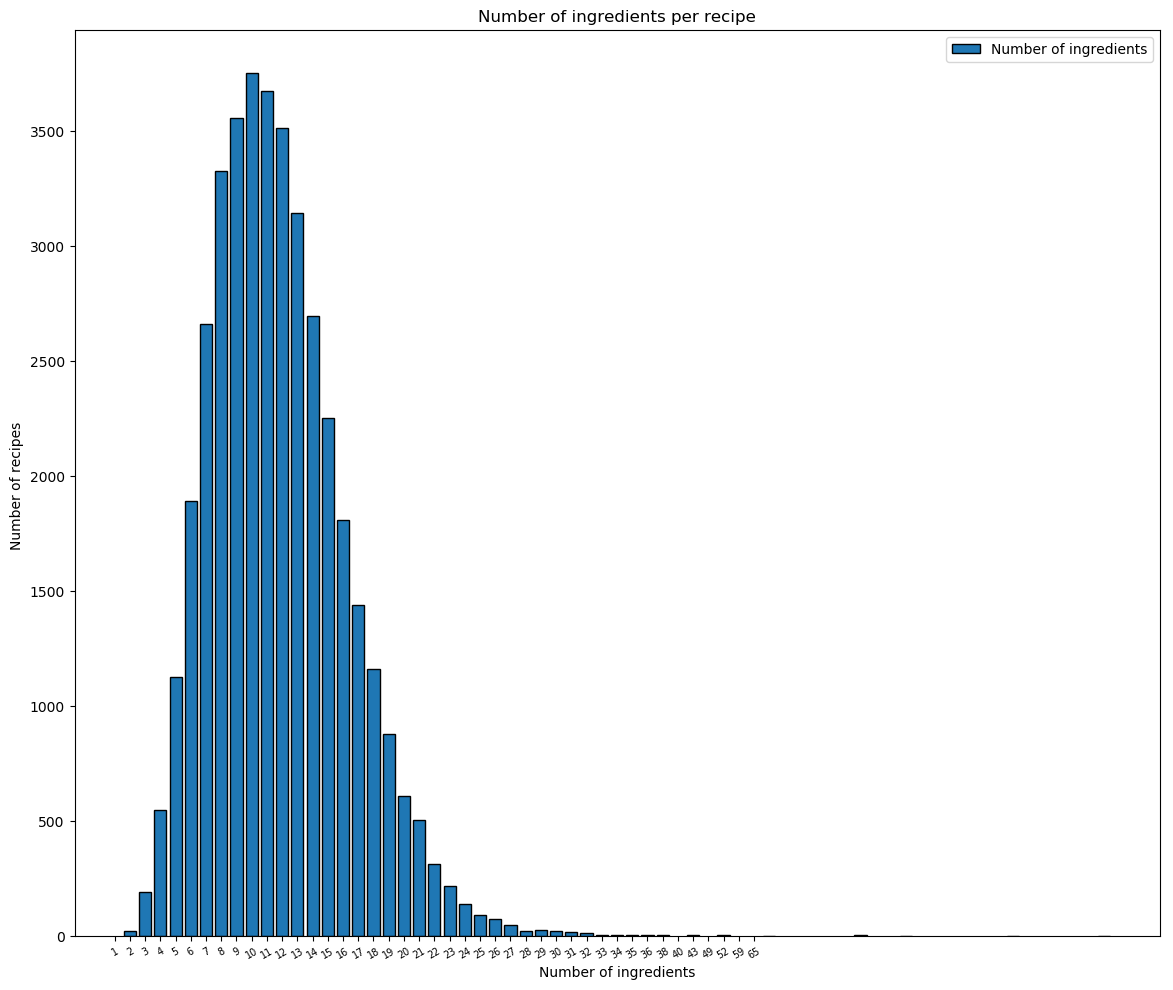

In [13]:
x_axis = n_recipes_per_meal["number_of_ingredients_per_recipe"].tolist()
y_axis = n_recipes_per_meal["number_of_recipes"].tolist()
index = np.arange(len(x_axis))
plt.style.use('fast')
plt.figure(figsize=(14, 12), dpi= 100)
plt.bar(x_axis, y_axis, label ="Number of ingredients", edgecolor="k")
plt.xticks(index, x_axis, fontsize=7, rotation = 30)
plt.xlabel("Number of ingredients", fontsize=10)
plt.ylabel("Number of recipes ", fontsize=10)
plt.legend()
plt.title("Number of ingredients per recipe")
plt.show()

The insight we can get from the table above is that, in our Training set, some recipes do contain one single ingredient, which can be an anomaly that might affect our predictions, we will find out when we dig into the test set so that we can decide<br/>
There are 1 recipe with 65 ingredients, 22 recipes with 1 ingredient and 3753 recipes with 9 ingredients <br/>
The given histogram shows that the range of ingredients vary between 1 and 65 ingredients, most of the recipes are between 5 and 18 ingredients

### Visualing extreme cases' ingredients 

- one-ingredient's recipes :

In [14]:
ingredients_set = traindf.ingredients
countries = traindf.cuisine
df_one_ingredient = []
for ingredients, country in zip(ingredients_set, countries) :
    if len(ingredients) == 1 :
        df_one_ingredient.append((country, ingredients[0]))
pd.DataFrame(df_one_ingredient, columns=['Country', 'Mono ingredient']).sort_values(by='Country').reset_index(drop= True)

,Country,Mono ingredient
0,french,haricots verts
1,french,butter
2,greek,phyllo
3,indian,unsalted butter
4,indian,plain low-fat yogurt
5,indian,unsalted butter
6,indian,cumin seed
7,indian,butter
8,indian,unsalted butter
9,italian,cherry tomatoes


some of the mono recipes are constitued of only water, cumin seed or butter like in french, indian and thai recipes, which can represent an erroneous data. the test-set will tell us more about these data

- two-ingredients' recipes

In [15]:
ingredients_set = traindf.ingredients
countries = traindf.cuisine
df_one_ingredient = []
for ingredients, country in zip(ingredients_set, countries) :
    if len(ingredients) == 2 :
        df_one_ingredient.append((country, ingredients))
pd.DataFrame(df_one_ingredient, columns=['Country', 'ingredients']).sort_values(by='Country').reset_index(drop= True)

,Country,ingredients
0,brazilian,"[juice, frozen strawberries]"
1,brazilian,"[muenster cheese, cream cheese]"
2,brazilian,"[cocoa powder, condensed milk]"
3,british,"[cream, coffee]"
4,british,"[milk chocolate, Crispy Rice Cereal]"
5,british,"[puff pastry, minced meat]"
6,cajun_creole,"[asparagus, cajun seasoning]"
7,cajun_creole,"[water, coffee]"
8,cajun_creole,"[vegetable oil, all-purpose flour]"
9,cajun_creole,"[all-purpose flour, vegetable oil]"


### number of ingredients per country

In [16]:
recipes_per_country = pd.concat([traindf.cuisine,traindf.ingredients.map(lambda l: len(l))], axis=1).rename(columns={'ingredients':'number_ingredients'}).sort_values(by='number_ingredients', ascending=False).reset_index(drop=True)
recipes_per_country

,cuisine,number_ingredients
0,italian,65
1,brazilian,59
2,mexican,52
3,mexican,49
4,indian,49
5,italian,43
6,thai,40
7,southern_us,40
8,indian,40
9,chinese,38


The number of ingredients per country (recipe) ordered by that number is not really indicative, so let's calculate the average number of ingredients per country

In [17]:
df_mean_ingredients = recipes_per_country.groupby("cuisine").agg({'number_ingredients' : ['mean']})
df_mean_ingredients.columns = ["_".join(x) for x in df_mean_ingredients.columns.ravel()]
df_mean_ingredients = df_mean_ingredients.sort_values(by='number_ingredients_mean', ascending=False)
df_mean_ingredients

,number_ingredients_mean
cuisine,
moroccan,12.909866
indian,12.705961
vietnamese,12.675152
cajun_creole,12.617076
thai,12.545809
jamaican,12.214829
chinese,11.982791
korean,11.284337
mexican,10.877446


Moroccan, indian and vietnamese recipes come on top of the countries with the biggest average number of ingredients :<br/>
The >50 ingredient recipes might be an anomaly as in the italian 65 ingredients extreme case
southern_us, brazilian and irish recipes come on bottom of the ranking for the average ingredients' number, but the range (difference between max and min values) is very small.

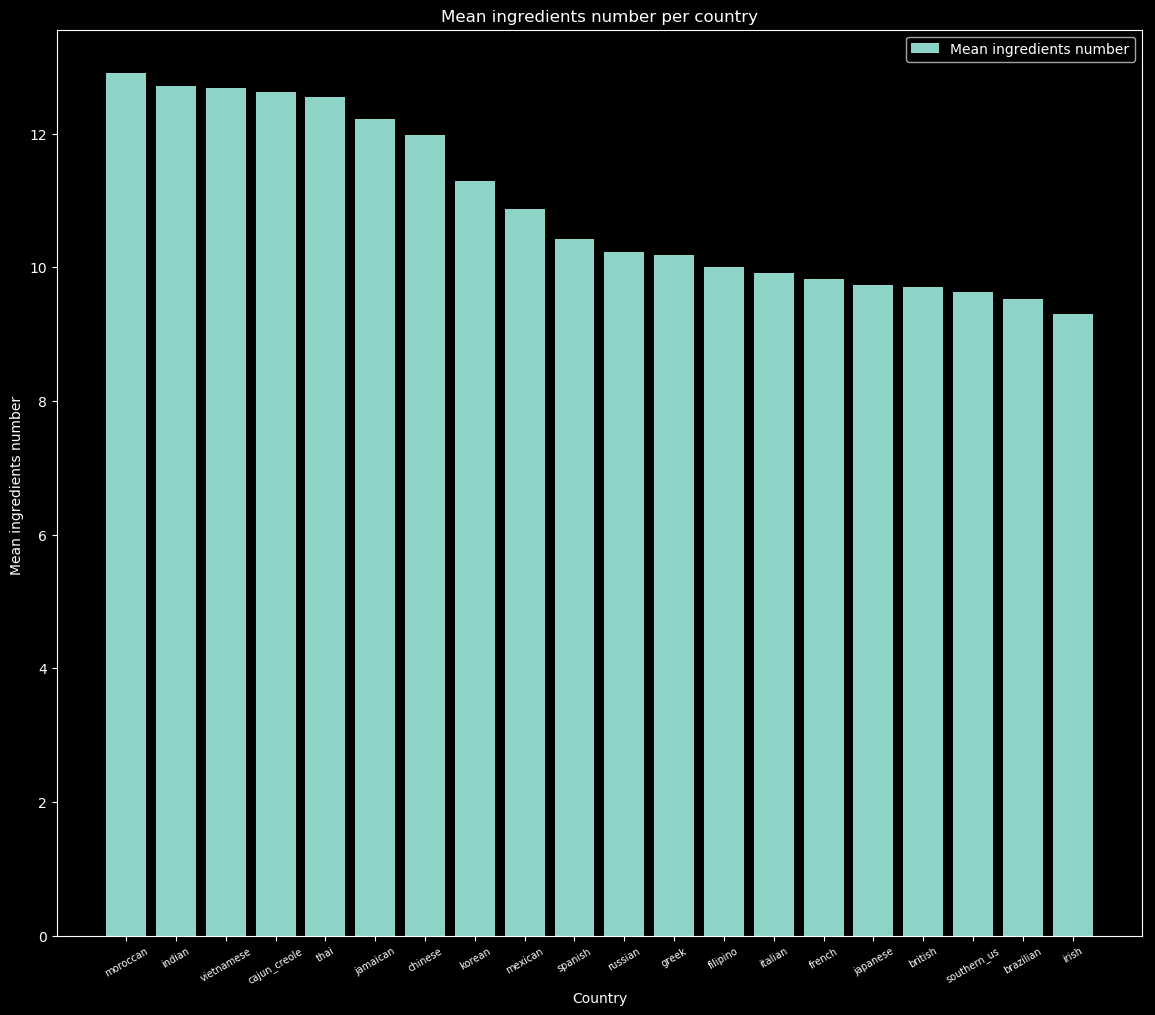

In [18]:
x_axis = df_mean_ingredients.index.tolist()
y_axis = df_mean_ingredients["number_ingredients_mean"].tolist()
index = np.arange(len(x_axis))
plt.style.use('dark_background')
plt.figure(figsize=(14, 12), dpi= 100)
plt.bar(x_axis, y_axis, label ="Mean ingredients number")
plt.xticks(index, x_axis, fontsize=7, rotation = 30)
plt.xlabel("Country", fontsize=10)
plt.ylabel("Mean ingredients number ", fontsize=10)
plt.legend()
plt.title("Mean ingredients number per country")
plt.show()

In order to get a better idea of our supposition, we will need to plot the data using a box plot, the existence of long and short recipes' ingredients in our data would mean that outliers should be considered in the learning process

In [19]:
# data= (pd.concat([traindf.cuisine,traindf.ingredients.map(lambda l: len(l))], axis=1).rename(columns={'ingredients':'Number_of_ingredients'}))
# x=data.cuisine
# y=data.Number_of_ingredients 

# f, ax = plt.subplots(figsize=(32,15))
# #plt.rcParams["axes.labelsize"] = 30
# #ax.plot(x, y, marker='s', linestyle='none', label='big')
# sns.boxplot(x,y,data)

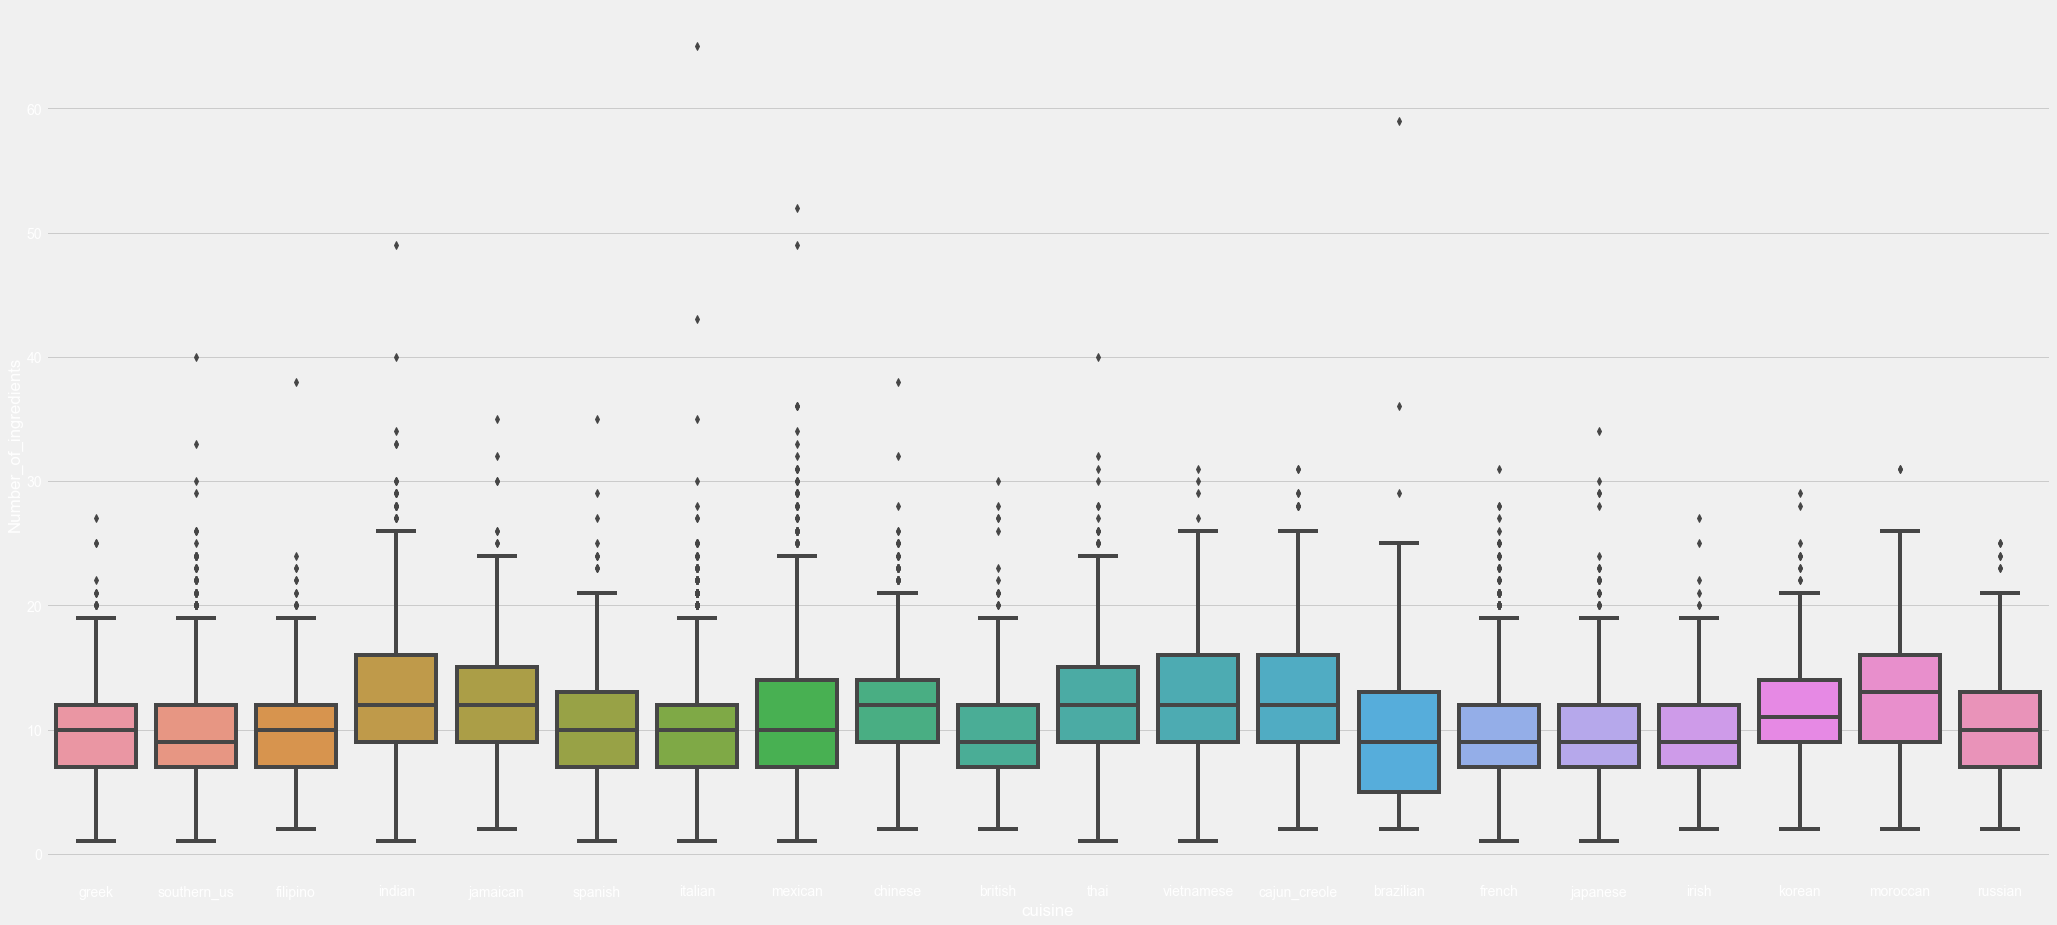

In [35]:
f, ax = plt.subplots(figsize=(32,15))
plt.style.use('fivethirtyeight')
sns.boxplot(x='cuisine',
            y='Number_of_ingredients',
            data= (pd.concat([traindf.cuisine,traindf.ingredients.map(lambda l: len(l))], axis=1)
                   .rename(columns={'ingredients':'Number_of_ingredients'}))
            )

As supposed, outliers exist in our entire model<br/>
The two extreme outliers in Italian and Brazilian seem to be much of an inccaruate data

- Ingredients' distribution within the target variable (Country/ Recipe)

In [21]:
print("Top 10 used ingredients")
counters = {}
for cuisine in traindf['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (traindf['cuisine'] == cuisine)
    for ingredients in traindf[indices]['ingredients']:
        counters[cuisine].update(ingredients)
df_top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
df_top10

Top 10 used ingredients


,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs


In [22]:
# def repl(m):
#     ingredient = m.groups()[0]
#     image_path = 'img/' + ingredient + '.png'
#     with open(image_path, "rb") as image_file:
#         encoded_string = base64.b64encode(image_file.read())
#     return '{}">'.format(encoded_string.decode('utf-8'))

# table_with_images = re.sub("([ \-\w]+)", repl, df_top10.to_html())

# from IPython.display import HTML
# HTML(table_with_images)

In [23]:

mlb = MultiLabelBinarizer()
def count_ingredients():
    df = pd.DataFrame(mlb.fit_transform(traindf['ingredients']), columns=mlb.classes_, index=traindf.index)
    df = pd.concat([traindf,df],axis=1)
    df = df.drop("ingredients",axis =1)
    df = df.drop("id",axis =1)
    df = df.groupby('cuisine').sum()
    return df

In [24]:
df = count_ingredients()
dd = pd.DataFrame(np.where(df>0, 1, 0),columns = df.columns)
for_only_one = dd.drop([col for col, val in dd.sum().iteritems() if val >=2], axis=1).columns
for_only_one_final = df[for_only_one].drop([col for col, val in df[for_only_one].sum().iteritems() if val <1], axis=1).columns
only_one = df[for_only_one_final].transpose()

In [25]:
def cuisine_specific(cuisine, style):
    plt.style.use(style)
    x = only_one[only_one[cuisine]>0].loc[:,cuisine].sort_values(ascending=False, axis=0).iloc[:20]
    ax = x.plot(kind='barh',figsize=(15,8),title="Items found only in cuisine "+cuisine,width = 0.9,alpha =0.9)
    ax.set_ylabel("Items")
    ax.set_xlabel("Count")

- Curious traditional plotting of cuisine specific ingredients = p

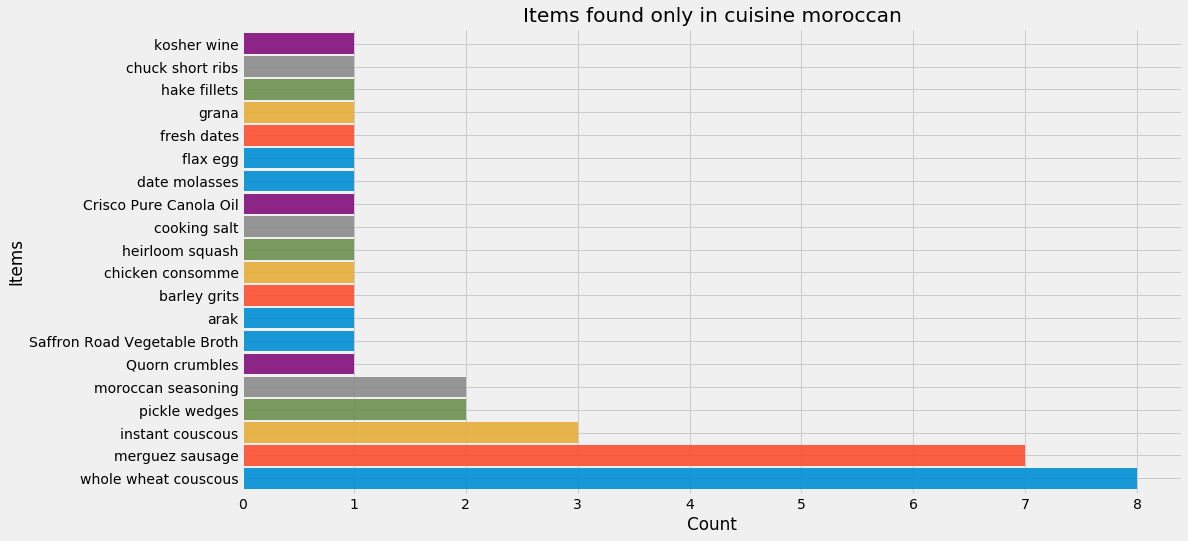

In [26]:
cuisine_specific("moroccan", "fivethirtyeight")

- Plotting the three cuisines' specific ingredients on top of recipes' number ranking

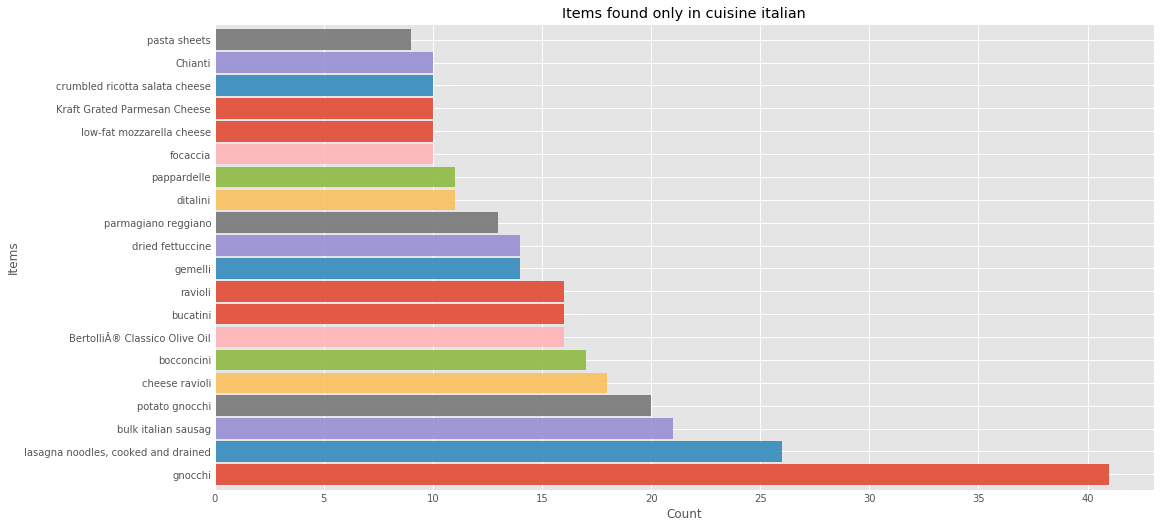

In [27]:
cuisine_specific("italian", 'ggplot')

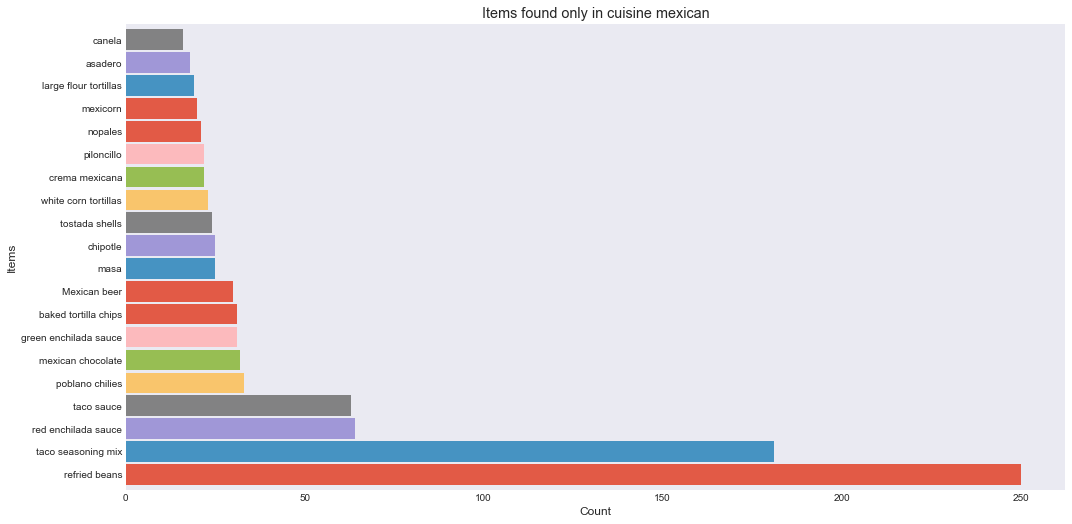

In [28]:
cuisine_specific("mexican", "seaborn-dark")

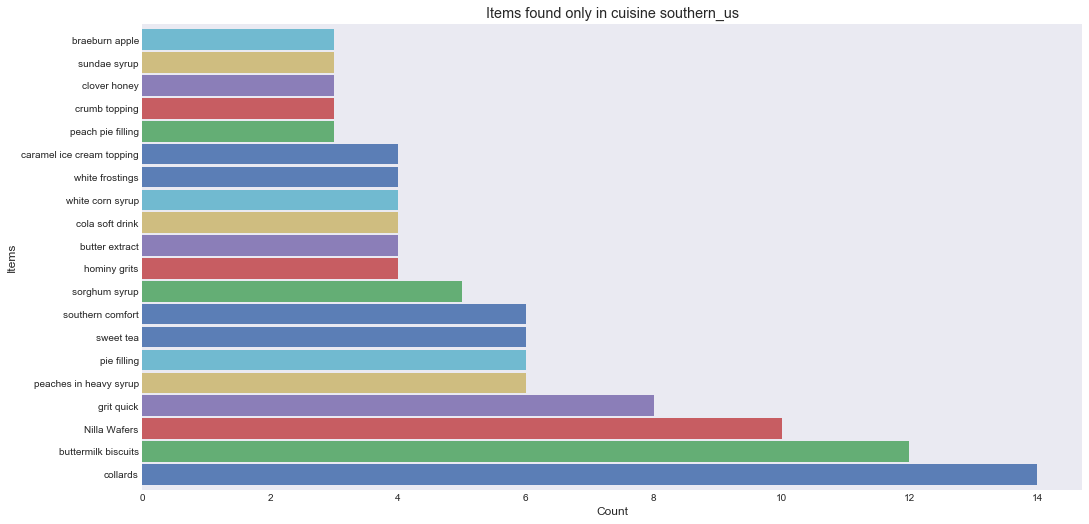

In [29]:
cuisine_specific("southern_us", "seaborn-deep")

- Plotting the three cuisines' specific ingredients on bottom of recipes' number ranking

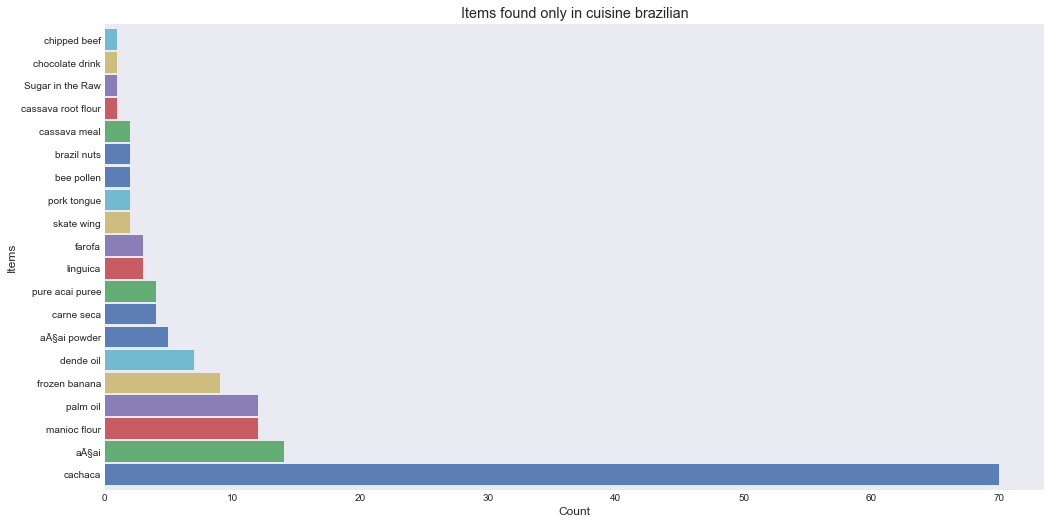

In [30]:
cuisine_specific("brazilian", 'fast')

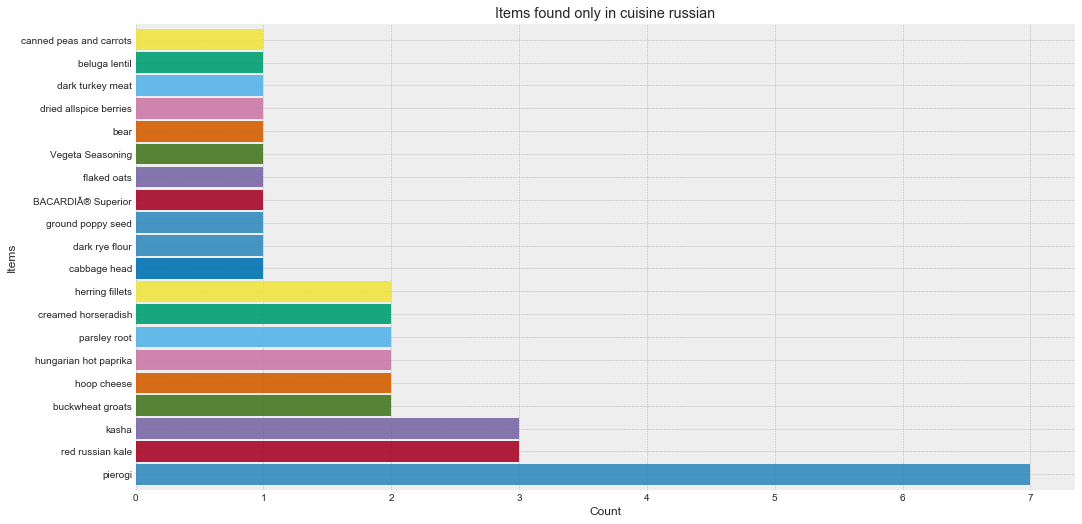

In [31]:
cuisine_specific("russian", 'bmh')

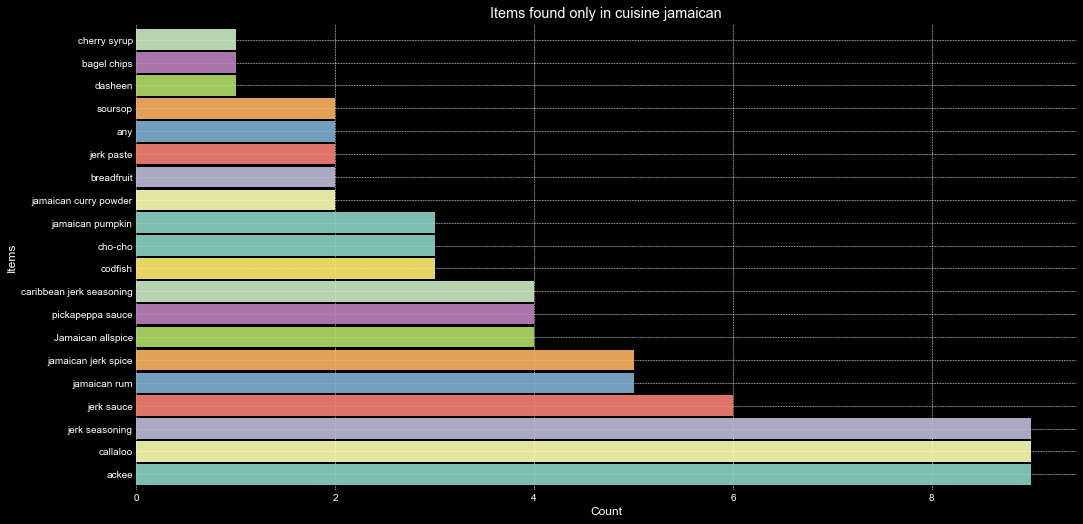

In [32]:
cuisine_specific("jamaican", 'dark_background')